In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sklearn

import networkx as nx
import pandas as pd, numpy as np
import matplotlib,matplotlib.pyplot as plt
import seaborn as sns

from networkx.algorithms import community
from glob import glob

In [ ]:
# matplotlib settings

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

## Generate panels related to network cluster analysis (Fig 3)

Plots of expression by cluster and metacluster analysis. Uses intermediate data files generated by network optimization code.

In [10]:
data_loc = '../data/supp_tables'

node_annotation = pd.read_csv(f'{data_loc}/table_S11_network_nodes.tsv', sep = '\t')
node_annotation.head()

,gene_name,ensgene,prize,type,direction,terminal,degree,betweenness,robustness,specificity,...,source,location,general_process,specific_process,general_function,specific_function,log2FC_prot,log2FC_rna,gene_DS_status,Fig1_plot_group
0,CORO7-PAM16,NaN,0.376145,protein,neg,True,1,0.000000,1.0,0.07,...,protein,NaN,NaN,NaN,NaN,NaN,-0.908277,NaN,DS,NaN
1,KALRN,ENSG00000160145,0.723954,protein,neg,True,8,0.001753,1.0,0.07,...,protein,extracellular,biological regulation,regulation of biological process,molecular function regulator,guanyl-nucleotide exchange factor,-1.643463,-0.185882,DS,DEP + DS
2,SYT7,ENSG00000011347,0.585429,protein,neg,True,1,0.000000,1.0,0.03,...,protein,extracellular,biological regulation,regulation of biological process,binding,ion binding,-1.350653,0.028791,DS,DEP + DS
3,HDAC6,ENSG00000094631,0.553277,protein,neg,True,26,0.020163,1.0,0.05,...,protein,nucleus,biological regulation,regulation of biological process,binding,protein binding,-1.282693,-0.442619,DS,DEP + DS
4,TARDBP,ENSG00000120948,1.000000,protein,neg,True,66,0.079661,1.0,0.08,...,protein,nucleus,biological regulation,regulation of biological process,binding,organic cyclic compound binding,-1.051626,-1.475579,No DS,"DEP + DEG, no DS"


### Boxplot for panel B

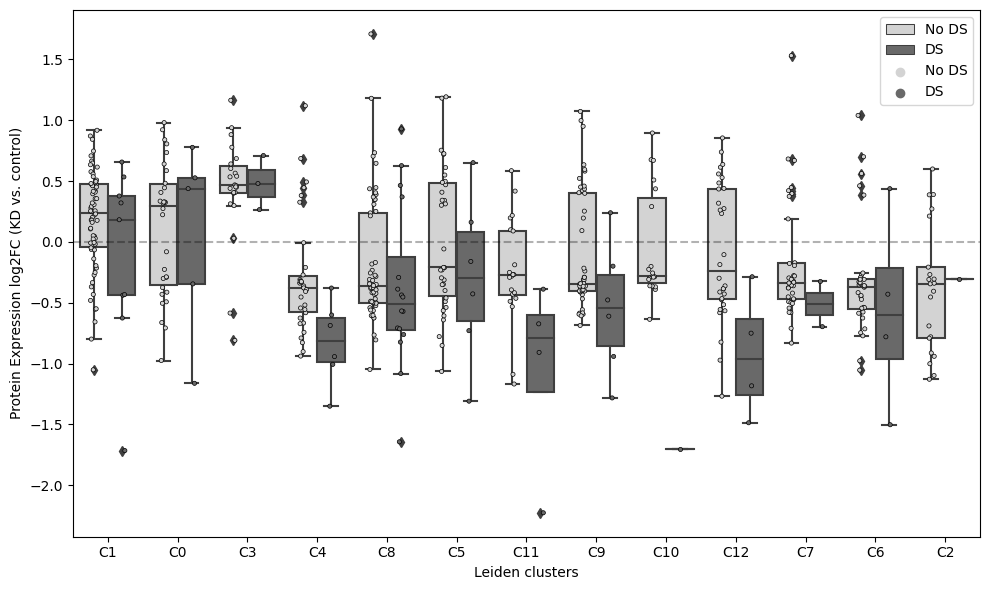

In [13]:
# Boxplot with DS genes separated
binary_palette = {
    'No DS': 'lightgray',
    'DS': 'dimgrey'
}

leiden_order = [
    1, 0, 3, 4, 8, 5, 11, 9, 10, 12, 7, 6, 2
]

plt.figure(figsize=(10, 6))

ax = sns.boxplot(
    data=node_annotation,
    x='leiden_clusters',
    y='log2FC_prot',
    hue='gene_DS_status',
    hue_order=['No DS', 'DS'],
    order=leiden_order,
    palette=binary_palette
)

# Add jittered points
np.random.seed(1)
sns.stripplot(
    data=node_annotation,
    x='leiden_clusters',
    y='log2FC_prot',
    hue='gene_DS_status',
    hue_order=['No DS', 'DS'],
    order=leiden_order,
    palette=binary_palette,
    dodge=True,
    edgecolor='black',
    linewidth=0.5,
    size=3,
    ax=ax
)

# Remove duplicate legend entries
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title='Diff. splicing')

# Wrap x-axis labels
# wrapped_labels = wrap_labels(leiden_order, width=20)
# ax.set_xticklabels(wrapped_labels, rotation=45, ha='right')

clabels = [f'C{label}' for label in leiden_order]
ax.set_xticklabels(clabels, rotation=0)

plt.ylabel('Protein Expression log2FC (KD vs. control)')
plt.xlabel('Leiden clusters')

plt.axhline(0, c ='k', linestyle = '--', alpha = 0.3)

# Adjust layout
plt.tight_layout()
plt.legend(bbox_to_anchor=[1,1])

# plt.savefig('fig3_cluster_boxplot_B.pdf', format='pdf', dpi=300, bbox_inches='tight')
# plt.savefig('fig3_cluster_boxplot_B.png', format='png', dpi=300, bbox_inches='tight')

plt.show()